### Import libraries here

In [1]:
libPath = '/home/mayank/Documents/upgraded-octo-lamp/'
import sys
sys.path.append(libPath)
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from v2i.src.core.common import loadPKL

## Data files

In [2]:
onlyLV10mPath = "/home/mayank/ray_results/compare/onlyLocalView10m_gamma_0.999_shared_vf/data_tf_enabled.pkl"
onlyLV40mPath = "/home/mayank/ray_results/compare/onlyLocalView40m_gamma_0.999_shared_vf/data_tf_enabled.pkl"
FC40mPath = '/home/mayank/ray_results/compare/fullComm40m_gamma_0.999_vf_shared_part_2/data_tf_enabled.pkl'
FC40mdelayedPath = '/home/mayank/ray_results/compare/fullComm40-delayed-gamma-0.999/data_tf_enabled.pkl'
FC40mkeepDelayedPath = '/home/mayank/ray_results/compare/fullComm40-keep-delayed-gamma-0.999/data_tf_enabled.pkl'
FC40mkeepInstPath = '/home/mayank/ray_results/compare/PPO_v2i-v0_0_2019-12-14_14-55-01988dk38h/data_tf_enabled.pkl'
#FC40mAgePath = '/home/mayank/ray_results/compare/PPO_v2i-v0_0_2019-12-10_14-19-307cjnf15d/data_tf_enabled.pkl'
#FC40mAgev2Path = '/home/mayank/ray_results/homogeneous-with-tf-LV-40m/fullComm40Age-age-v2-part-1/data_tf_enabled.pkl'

# no tf lights
onlyLV10mNoTFPath = '/home/mayank/ray_results/compare/onlyLocalView10m_gamma_0.999_shared_vf/data_tf_disabled.pkl'
onlyLV40mNoTFPath = '/home/mayank/ray_results/compare/onlyLocalView40m_gamma_0.999_shared_vf/data_tf_disabled.pkl'
FC40mPathNoTF = '/home/mayank/ray_results/compare/fullComm40m_gamma_0.999_vf_shared_part_2/data_tf_disabled.pkl'
FC40mdelayedNoTFPath = '/home/mayank/ray_results/compare/fullComm40-delayed-gamma-0.999/data_tf_disabled.pkl'
FC40mkeepDelayedNoTFPath = '/home/mayank/ray_results/compare/fullComm40-keep-delayed-gamma-0.999/data_tf_disabled.pkl'
FC40mkeepInstNoTFPath = '/home/mayank/ray_results/compare/PPO_v2i-v0_0_2019-12-14_14-55-01988dk38h/data_tf_disabled.pkl'
#FC40mAgePathNoTF = '/home/mayank/ray_results/compare/PPO_v2i-v0_0_2019-12-10_14-19-307cjnf15d/data_tf_disabled.pkl'
#FC40mAgev2PathNoTF = '/home/mayank/ray_results/homogeneous-with-tf-LV-40m/fullComm40Age-age-v2-part-1/data_tf_disabled.pkl'

## Load all data

In [3]:
onlyLV10mData = loadPKL(onlyLV10mPath)
onlyLV40mData = loadPKL(onlyLV40mPath)
FC40mData = loadPKL(FC40mPath)
FC40mdelayedData = loadPKL(FC40mdelayedPath)
FC40mkeepDelayedData = loadPKL(FC40mkeepDelayedPath)
FC40mkeepInstData = loadPKL(FC40mkeepInstPath)
#FC40mAgeData = loadPKL(FC40mAgePath)
#FC40mAgev2Data = loadPKL(FC40mAgev2Path)


# no tf lights
onlyLV10mDataNoTF = loadPKL(onlyLV10mNoTFPath)
onlyLV40mDataNoTF = loadPKL(onlyLV40mNoTFPath)
FC40mDataNoTF = loadPKL(FC40mPathNoTF)
FC40mdelayedDataNoTF = loadPKL(FC40mdelayedNoTFPath)
FC40mkeepDelayedDataNoTF = loadPKL(FC40mkeepDelayedNoTFPath)
FC40mkeepInstDataNoTF = loadPKL(FC40mkeepInstNoTFPath)
#FC40mAgeDataNoTF = loadPKL(FC40mAgePathNoTF)
#FC40mAgev2DataNoTF = loadPKL(FC40mAgev2PathNoTF)


# Get density

In [4]:
episodesDensity = list(onlyLV10mData['data'].keys())[0]
print(episodesDensity)

0.2_0.2


<h1 align="center"> With Traffic Lights </h1>

# Assert episode density of all cases

In [5]:
assert list(onlyLV10mData['data'].keys())[0] == episodesDensity
assert list(onlyLV40mData['data'].keys())[0] == episodesDensity
assert list(FC40mData['data'].keys())[0] == episodesDensity
#assert list(FC40mAgeData['data'].keys())[0] == episodesDensity
assert list(FC40mkeepDelayedData['data'].keys())[0] == episodesDensity
#assert list(FC40mAgev2Data['data'].keys())[0] == episodesDensity
assert list(FC40mdelayedData['data'].keys())[0] == episodesDensity
assert list(FC40mkeepInstData['data'].keys())[0] == episodesDensity

# Agent average speed comparison

In [6]:
def avgSpeed(dataDict):
    data = {}
    data['complete'] = []
    data['not-complete'] = []
    
    for episode in dataDict['data'][episodesDensity].keys():
        agentCarID = dataDict['data'][episodesDensity][episode]['agentCarID']
        epLen = len(dataDict['data'][episodesDensity][episode]['speed'][agentCarID])
        
        if epLen == (dataDict['max-episode-length'] + 1):
            agentCarID = dataDict['data'][episodesDensity][episode]['agentCarID']
            speedData = dataDict['data'][episodesDensity][episode]['speed'][agentCarID]
            data['complete'].append(speedData)
        else:
            speedData = dataDict['data'][episodesDensity][episode]['speed'][agentCarID]
            data['not-complete'].append(speedData)
    data['complete'] = np.array(data['complete'])
    totalEpisodes = len(data['complete']) + len(data['not-complete'])
    
    print("Complete episodes : %.2f"%(len(data['complete'])/totalEpisodes))
    print("%d/%d"%(len(data['complete']), totalEpisodes))
    return data

In [7]:
onlyLV10mspeedData = avgSpeed(onlyLV10mData)
onlyLV10mspeed = onlyLV10mspeedData['complete'].sum(axis=1) / onlyLV10mspeedData['complete'].shape[1]
onlyLV10mspeed *= 3.6

Complete episodes : 0.84
42/50


In [8]:
onlyLV40mspeedData = avgSpeed(onlyLV40mData)
onlyLV40mspeed = onlyLV40mspeedData['complete'].sum(axis=1) / onlyLV40mspeedData['complete'].shape[1]
onlyLV40mspeed *= 3.6

Complete episodes : 0.66
33/50


In [9]:
FC40mspeedData = avgSpeed(FC40mData)
FC40mspeed = FC40mspeedData['complete'].sum(axis=1) / FC40mspeedData['complete'].shape[1]
FC40mspeed *= 3.6

Complete episodes : 0.69
55/80


In [10]:
FC40mAgespeedData = avgSpeed(FC40mAgeData)
FC40mAgespeed = FC40mAgespeedData['complete'].sum(axis=1) / FC40mAgespeedData['complete'].shape[1]
FC40mAgespeed *= 3.6

NameError: name 'FC40mAgeData' is not defined

In [11]:
FC40mAgev2speedData = avgSpeed(FC40mAgev2Data)
FC40mAgev2speed = FC40mAgev2speedData['complete'].sum(axis=1) / FC40mAgev2speedData['complete'].shape[1]
FC40mAgev2speed *= 3.6

NameError: name 'FC40mAgev2Data' is not defined

In [12]:
FC40mdelayedspeedData = avgSpeed(FC40mdelayedData)
FC40mdelayedspeed = FC40mdelayedspeedData['complete'].sum(axis=1) / FC40mdelayedspeedData['complete'].shape[1]
FC40mdelayedspeed *= 3.6

Complete episodes : 0.66
132/200


In [13]:
FC40mkeepDelayedSpeedData = avgSpeed(FC40mkeepDelayedData)
FC40mkeepDelayedspeed = FC40mkeepDelayedSpeedData['complete'].sum(axis=1) / FC40mkeepDelayedSpeedData['complete'].shape[1]
FC40mkeepDelayedspeed *= 3.6

Complete episodes : 0.69
137/200


In [14]:
FC40mkeepInstSpeedData = avgSpeed(FC40mkeepInstData)
FC40mkeepInstspeed = FC40mkeepInstSpeedData['complete'].sum(axis=1) / FC40mkeepInstSpeedData['complete'].shape[1]
FC40mkeepInstspeed *= 3.6

Complete episodes : 0.71
143/200


In [15]:
FC40mkeepDelayedSpeedData.keys()

dict_keys(['complete', 'not-complete'])

<IPython.core.display.Javascript object>


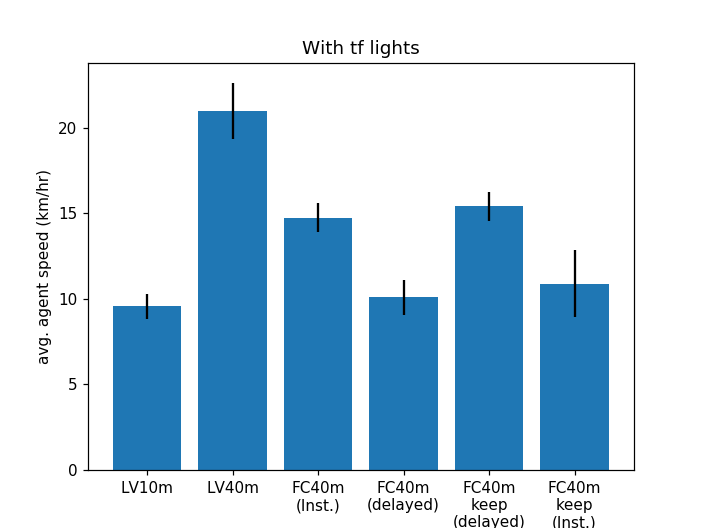

In [16]:
#xticks = ['LV10m', 'LV40m', 'FC40m\n(Inst.)', 'FC40m\n(delayed)', 'FC40m \nAge \n(delayed)', 'FC40m \nAge\n(Inst.)']
xticks = ['LV10m', 'LV40m', 'FC40m\n(Inst.)', 'FC40m\n(delayed)', 'FC40m\nkeep\n(delayed)', 'FC40m\nkeep\n(Inst.)']
plt.xticks([0, 1, 2, 3, 4, 5], xticks, rotation=0)
plt.bar([0, 1, 2, 3, 4, 5], [onlyLV10mspeed.mean(), onlyLV40mspeed.mean(), FC40mspeed.mean(), FC40mdelayedspeed.mean(), FC40mkeepDelayedspeed.mean(), FC40mkeepInstspeed.mean()], yerr=[onlyLV10mspeed.std(), onlyLV40mspeed.std(), FC40mspeed.std(), FC40mdelayedspeed.std(), FC40mkeepDelayedspeed.std(), FC40mkeepInstspeed.std()],)
plt.ylabel('avg. agent speed (km/hr)')
plt.title("With tf lights")
plt.show()
#plt.grid()

### No TF case

In [17]:
LV10mspeedDataNoTF = avgSpeed(onlyLV10mDataNoTF)
LV40mspeedDataNoTF = avgSpeed(onlyLV40mDataNoTF)
FC40mspeedDataNoTF = avgSpeed(FC40mDataNoTF)
#FC40mAgespeedDataNoTF = avgSpeed(FC40mAgeDataNoTF)
#FC40mAgev2speedDataNoTF = avgSpeed(FC40mAgev2DataNoTF)
FC40mdelayedspeedDataNoTF = avgSpeed(FC40mdelayedDataNoTF)
FC40mkeepDelayedspeedDataNoTF = avgSpeed(FC40mkeepDelayedDataNoTF)
FC40mkeepInstspeedDataNoTF = avgSpeed(FC40mkeepInstDataNoTF)

Complete episodes : 0.99
79/80
Complete episodes : 0.99
79/80
Complete episodes : 0.91
73/80
Complete episodes : 0.92
183/200
Complete episodes : 0.97
195/200
Complete episodes : 0.89
177/200


In [18]:
print(FC40mspeedDataNoTF['complete'].shape)
print(LV10mspeedDataNoTF['complete'].shape)
print(LV40mspeedDataNoTF['complete'].shape)
#print(FC40mAgespeedDataNoTF['complete'].shape)
#print(FC40mAgev2speedDataNoTF['complete'].shape)
print(FC40mdelayedspeedDataNoTF['complete'].shape)
print(FC40mkeepDelayedspeedDataNoTF['complete'].shape)
print(FC40mkeepInstspeedDataNoTF['complete'].shape)

(73, 2201)
(79, 2201)
(79, 2201)
(183, 2201)
(195, 2201)
(177, 2201)


## Percentage of planning actions

In [19]:
def getPlanActStats(dataDict):
    data = {}
    data['complete'] = []
    data['not-complete'] = []
    
    for episode in dataDict['data'][episodesDensity].keys():
        actData = dataDict['data'][episodesDensity][episode]['actions']
        epLen = len(actData)
        if epLen == dataDict['max-episode-length']:
            data['complete'].append(actData)
        else:
            data['not-complete'].append(actData)
    totalEpisodes = len(data['complete']) + len(data['not-complete'])
    print("Complete episodes : %.2f"%(len(data['complete'])/totalEpisodes))
    print("%d/%d"%(len(data['complete']), totalEpisodes))
    return data

In [20]:
planEncode = {}
planEncode['acc'] = 0
planEncode['dec'] = 1
planEncode['do-nothing'] = 2
planEncode['lane-change'] = 3

In [21]:
regs = ['reg_0', 'reg_1', 'null']

In [22]:
def parsePlanActs(episodes, keyMap):
    dataCount = {}
    for key in keyMap:
        dataCount[key] = 0
    
    stepsCount = 0
    for episode in episodes:
        for step in episode:
            dataCount[step[0]] += 1
            stepsCount += 1
    
    # Normalize the dict
    for key in keyMap:
        dataCount[key] /= stepsCount

    # Convert into percentages
    for key in keyMap:
        dataCount[key] *= 100.0
    return dataCount

In [23]:
def parseRegs(episodes, keyMap):
    dataCount = {}
    for key in keyMap:
        dataCount[key] = 0
    
    stepsCount = 0
    for episode in episodes:
        for step in episode:
            dataCount[step[1]] += 1
            stepsCount += 1
    
    # Normalize the dict
    for key in keyMap:
        dataCount[key] /= stepsCount
    
    # Convert into percentages
    for key in keyMap:
        dataCount[key] *= 100.0
    return dataCount

In [24]:
onlyLV10mActsStat = getPlanActStats(onlyLV10mData)
onlyLV10mplanActs = parsePlanActs(onlyLV10mActsStat['complete'],planEncode)
print(onlyLV10mplanActs)

Complete episodes : 0.84
42/50
{'acc': 54.32251082251083, 'dec': 26.886363636363637, 'do-nothing': 18.76731601731602, 'lane-change': 0.023809523809523808}


In [25]:
onlyLV40mActsStat = getPlanActStats(onlyLV40mData)
onlyLV40mplanActs = parsePlanActs(onlyLV40mActsStat['complete'], planEncode)
print(onlyLV40mplanActs)

Complete episodes : 0.66
33/50
{'acc': 31.94490358126722, 'dec': 17.431129476584022, 'do-nothing': 43.24517906336089, 'lane-change': 7.378787878787879}


In [26]:
FC40mActsStat = getPlanActStats(FC40mData)
FC40mplanActs = parsePlanActs(FC40mActsStat['complete'], planEncode)
FC40mcommActs = parseRegs(FC40mActsStat['complete'], regs)

Complete episodes : 0.69
55/80


In [27]:
FC40mAgeActsStat = getPlanActStats(FC40mAgeData)
FC40mAgeplanActs = parsePlanActs(FC40mAgeActsStat['complete'], planEncode)
FC40mAgecommActs = parseRegs(FC40mAgeActsStat['complete'], regs)

NameError: name 'FC40mAgeData' is not defined

In [28]:
FC40mAgev2ActsStat = getPlanActStats(FC40mAgev2Data)
FC40mAgev2planActs = parsePlanActs(FC40mAgev2ActsStat['complete'], planEncode)
FC40mAgev2commActs = parseRegs(FC40mAgev2ActsStat['complete'], regs)

NameError: name 'FC40mAgev2Data' is not defined

In [29]:
FC40mdelayedActsStat = getPlanActStats(FC40mdelayedData)
FC40mdelayedplanActs = parsePlanActs(FC40mdelayedActsStat['complete'], planEncode)
FC40mdelayedcommActs = parseRegs(FC40mdelayedActsStat['complete'], regs)

Complete episodes : 0.66
132/200


In [30]:
FC40mkeepDelayedActsStat = getPlanActStats(FC40mkeepDelayedData)
FC40mkeepDelayedplanActs = parsePlanActs(FC40mkeepDelayedActsStat['complete'], planEncode)
FC40mkeepDelayedcommActs = parseRegs(FC40mkeepDelayedActsStat['complete'], regs)

Complete episodes : 0.69
137/200


In [31]:
FC40mkeepInstActsStat = getPlanActStats(FC40mkeepInstData)
FC40mkeepInstplanActs = parsePlanActs(FC40mkeepInstActsStat['complete'], planEncode)
FC40mkeepInstcommActs = parseRegs(FC40mkeepInstActsStat['complete'], regs)

Complete episodes : 0.71
143/200


In [32]:
FC40mkeepDelayedplanActs

{'acc': 42.45189117451891,
 'dec': 19.968148639681484,
 'do-nothing': 37.197743861977436,
 'lane-change': 0.38221632382216325}

In [33]:
xticks

['LV10m',
 'LV40m',
 'FC40m\n(Inst.)',
 'FC40m\n(delayed)',
 'FC40m\nkeep\n(delayed)',
 'FC40m\nkeep\n(Inst.)']

<IPython.core.display.Javascript object>


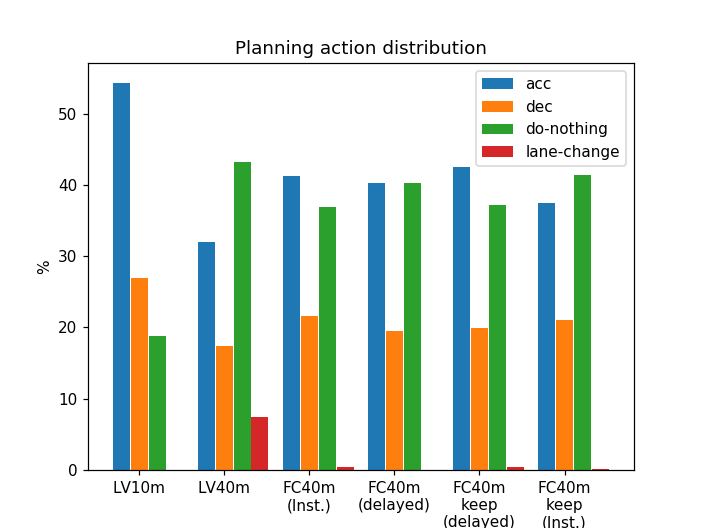

In [34]:
accBar = [onlyLV10mplanActs['acc'], onlyLV40mplanActs['acc'], FC40mplanActs['acc'], FC40mdelayedplanActs['acc'], FC40mkeepDelayedplanActs['acc'], FC40mkeepInstplanActs['acc']]
decBar = [onlyLV10mplanActs['dec'], onlyLV40mplanActs['dec'], FC40mplanActs['dec'], FC40mdelayedplanActs['dec'], FC40mkeepDelayedplanActs['dec'], FC40mkeepInstplanActs['dec']]
laneChangeBar = [onlyLV10mplanActs['lane-change'], onlyLV40mplanActs['lane-change'], FC40mplanActs['lane-change'], FC40mdelayedplanActs['lane-change'], FC40mkeepDelayedplanActs['lane-change'], FC40mkeepInstplanActs['lane-change']]
nothingBar = [onlyLV10mplanActs['do-nothing'], onlyLV40mplanActs['do-nothing'], FC40mplanActs['do-nothing'], FC40mdelayedplanActs['do-nothing'], FC40mkeepDelayedplanActs['do-nothing'], FC40mkeepInstplanActs['do-nothing']]
plt.bar(np.array([0, 1, 2, 3, 4, 5]) - 0.21, accBar, width=0.2, label='acc')
plt.bar(np.array([0, 1, 2, 3, 4, 5]), decBar, width=0.2, label='dec')
plt.bar(np.array([0, 1, 2, 3, 4, 5]) + 0.21, nothingBar, width=0.2, label='do-nothing')
plt.bar(np.array([0, 1, 2, 3, 4, 5]) + 0.42, laneChangeBar, width=0.2, label='lane-change')
plt.xticks([0, 1, 2, 3, 4, 5], xticks, rotation=0)
plt.legend()
plt.ylabel('%')
plt.title('Planning action distribution')
plt.show()

<IPython.core.display.Javascript object>


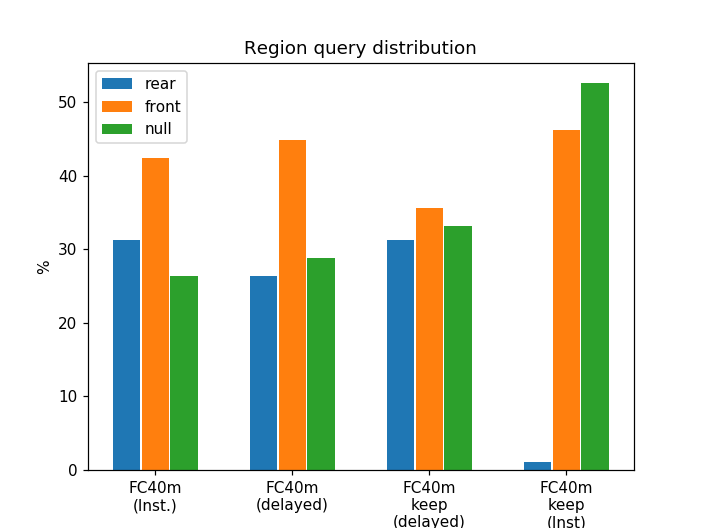

In [35]:
rearBar = [FC40mcommActs['reg_0'], FC40mdelayedcommActs['reg_0'] , FC40mkeepDelayedcommActs['reg_0'], FC40mkeepInstcommActs['reg_0']]
frontBar = [FC40mcommActs['reg_1'], FC40mdelayedcommActs['reg_1'], FC40mkeepDelayedcommActs['reg_1'], FC40mkeepInstcommActs['reg_1']]
nullBar = [FC40mcommActs['null'], FC40mdelayedcommActs['null'] ,FC40mkeepDelayedcommActs['null'], FC40mkeepInstcommActs['null']]

xticks = ['FC40m\n(Inst.)', 'FC40m\n(delayed)' ,'FC40m\nkeep\n(delayed)', 'FC40m\nkeep\n(Inst)']
plt.xticks([0, 1, 2, 3], xticks, rotation=0)
plt.bar(np.arange(0, len([0, 1, 2, 3])) - 0.21, rearBar, width=0.2, label='rear')
plt.bar(np.arange(0, len([0, 1, 2, 3])), frontBar, width=0.2, label='front')
plt.bar(np.arange(0, len([0, 1, 2, 3])) + 0.21, nullBar, width=0.2, label='null')
plt.legend()
plt.ylabel('%')
plt.title('Region query distribution')
plt.show()

## Agent speed as function of time

### with TF

<IPython.core.display.Javascript object>


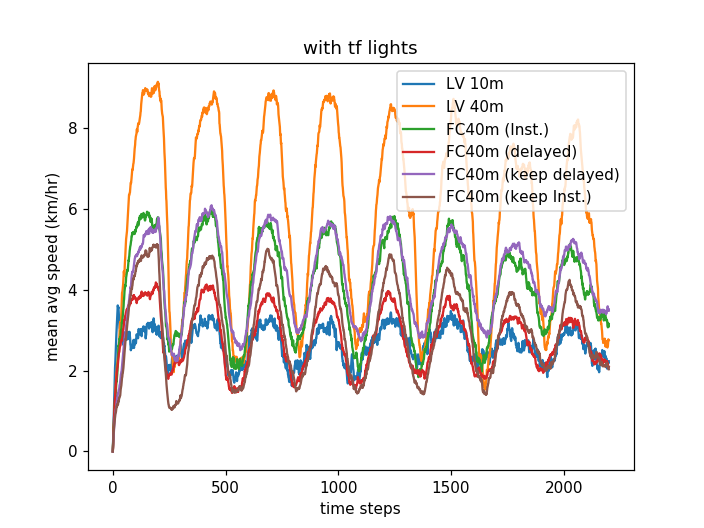

In [36]:
plt.plot(onlyLV10mspeedData['complete'].mean(axis=0), label='LV 10m')
plt.plot(onlyLV40mspeedData['complete'].mean(axis=0), label='LV 40m')
plt.plot(FC40mspeedData['complete'].mean(axis=0), label='FC40m (Inst.)')
plt.plot(FC40mdelayedspeedData['complete'].mean(axis=0), label='FC40m (delayed)')
plt.plot(FC40mkeepDelayedSpeedData['complete'].mean(axis=0), label='FC40m (keep delayed)')
plt.plot(FC40mkeepInstSpeedData['complete'].mean(axis=0), label='FC40m (keep Inst.)')
#plt.plot(FC40mAgespeedData['complete'].mean(axis=0), label='FC40m Age (delayed)')
#plt.plot(FC40mAgev2speedData['complete'].mean(axis=0), label='FC40m Age (Inst.)')

plt.xlabel('time steps')
plt.legend()
plt.title("with tf lights")
plt.ylabel('mean avg speed (km/hr)')
plt.show()

## Age comparison

In [34]:
def getAgeVector(dataDict, trueAge=True):
    data = {}
    data['complete'] = []
    data['not-complete'] = []
    
    for episode in dataDict['data'][episodesDensity].keys():
        if trueAge:
            ageVec = dataDict['data'][episodesDensity][episode]['trueAge']
        else:
            ageVec = dataDict['data'][episodesDensity][episode]['agentAge']
        
        epLen = len(ageVec)
        if epLen == dataDict['max-episode-length']:
            data['complete'].append(ageVec)
        else:
            data['not-complete'].append(ageVec)
    
    return data

In [35]:
FC40mAgeTrueAgeData = getAgeVector(FC40mAgeData)
FC40mAgeAgentAgeData = getAgeVector(FC40mAgeData, trueAge=False)

NameError: name 'FC40mAgeData' is not defined

In [36]:
FC40mAgev2TrueAgeData = getAgeVector(FC40mAgev2Data)
FC40mAgev2AgentAgeData = getAgeVector(FC40mAgev2Data, trueAge=False)

NameError: name 'FC40mAgev2Data' is not defined

In [37]:
plt.plot(np.array(FC40mAgeTrueAgeData['complete']).mean(axis=0), label="True Age, FC 40m Age (delayed)")
plt.plot(np.array(FC40mAgeAgentAgeData['complete']).mean(axis=0), label="Agent Age, FC 40m Age (delayed)")
#plt.plot(np.array(FC40mAgev2TrueAgeData['complete']).mean(axis=0), label="True Age, FC 40m Age (Inst.)")
#plt.plot(np.array(FC40mAgev2AgentAgeData['complete']).mean(axis=0), label="Agent Age, FC 40m Age (Inst.)")
plt.legend()
plt.ylabel('mean Age')
plt.xlabel('time-steps')
plt.plot()

NameError: name 'FC40mAgeTrueAgeData' is not defined

In [38]:
'''
plt.plot(np.array(FC40mAgeTrueAgeData['complete']).mean(axis=0), label="True Age, Age FC 40m")
plt.plot(np.array(FC40mAgev2TrueAgeData['complete']).mean(axis=0), label="True Age, Age v2 FC 40m")
plt.plot(FC40mAgev2speedData['complete'].mean(axis=0)/15.0, label='Agent mean speed, Age v2 FC 40m')
plt.plot(FC40mAgespeedData['complete'].mean(axis=0)/15.0, label='Agent mean speed, Age FC 40m')
plt.legend()
plt.xlabel('time-steps')
plt.grid()
plt.show()
'''

'\nplt.plot(np.array(FC40mAgeTrueAgeData[\'complete\']).mean(axis=0), label="True Age, Age FC 40m")\nplt.plot(np.array(FC40mAgev2TrueAgeData[\'complete\']).mean(axis=0), label="True Age, Age v2 FC 40m")\nplt.plot(FC40mAgev2speedData[\'complete\'].mean(axis=0)/15.0, label=\'Agent mean speed, Age v2 FC 40m\')\nplt.plot(FC40mAgespeedData[\'complete\'].mean(axis=0)/15.0, label=\'Agent mean speed, Age FC 40m\')\nplt.legend()\nplt.xlabel(\'time-steps\')\nplt.grid()\nplt.show()\n'

<h1 align="center"> Without traffic lights </h1>

# Assert episode density of all cases

In [37]:
assert list(onlyLV10mDataNoTF['data'].keys())[0] == episodesDensity
assert list(onlyLV40mDataNoTF['data'].keys())[0] == episodesDensity
assert list(FC40mDataNoTF['data'].keys())[0] == episodesDensity
#assert list(FC40mAgeDataNoTF['data'].keys())[0] == episodesDensity
#assert list(FC40mAgev2DataNoTF['data'].keys())[0] == episodesDensity
assert list(FC40mdelayedDataNoTF['data'].keys())[0] == episodesDensity
assert list(FC40mdelayedDataNoTF['data'].keys())[0] == episodesDensity
assert list(FC40mkeepInstDataNoTF['data'].keys())[0] == episodesDensity

# Agent average speed comparison

In [38]:
onlyLV10mspeedDataNoTF = avgSpeed(onlyLV10mDataNoTF)
onlyLV10mspeedNoTF = onlyLV10mspeedDataNoTF['complete'].sum(axis=1) / onlyLV10mspeedDataNoTF['complete'].shape[1]
onlyLV10mspeedNoTF *= 3.6

Complete episodes : 0.99
79/80


In [39]:
onlyLV40mspeedDataNoTF = avgSpeed(onlyLV40mDataNoTF)
onlyLV40mspeedNoTF = onlyLV40mspeedDataNoTF['complete'].sum(axis=1) / onlyLV40mspeedDataNoTF['complete'].shape[1]
onlyLV40mspeedNoTF *= 3.6

Complete episodes : 0.99
79/80


In [40]:
FC40mspeedDataNoTF = avgSpeed(FC40mDataNoTF)
FC40mspeedNoTF = FC40mspeedDataNoTF['complete'].sum(axis=1) / FC40mspeedDataNoTF['complete'].shape[1]
FC40mspeedNoTF *= 3.6

Complete episodes : 0.91
73/80


In [41]:
FC40mAgespeedDataNoTF = avgSpeed(FC40mAgeDataNoTF)
FC40mAgespeedNoTF = FC40mAgespeedDataNoTF['complete'].sum(axis=1) / FC40mAgespeedDataNoTF['complete'].shape[1]
FC40mAgespeedNoTF *= 3.6

NameError: name 'FC40mAgeDataNoTF' is not defined

In [42]:
FC40mAgev2speedDataNoTF = avgSpeed(FC40mAgev2DataNoTF)
FC40mAgev2speedNoTF = FC40mAgev2speedDataNoTF['complete'].sum(axis=1) / FC40mAgev2speedDataNoTF['complete'].shape[1]
FC40mAgev2speedNoTF *= 3.6

NameError: name 'FC40mAgev2DataNoTF' is not defined

In [43]:
FC40mdelayedspeedDataNoTF = avgSpeed(FC40mdelayedDataNoTF)
FC40mdelayedspeedNoTF = FC40mdelayedspeedDataNoTF['complete'].sum(axis=1) / FC40mdelayedspeedDataNoTF['complete'].shape[1]
FC40mdelayedspeedNoTF *= 3.6

Complete episodes : 0.92
183/200


In [44]:
FC40mkeepDelayedspeedDataNoTF = avgSpeed(FC40mkeepDelayedDataNoTF)
FC40mkeepDelayedspeedNoTF = FC40mkeepDelayedspeedDataNoTF['complete'].sum(axis=1) / FC40mkeepDelayedspeedDataNoTF['complete'].shape[1]
FC40mkeepDelayedspeedNoTF *= 3.6

Complete episodes : 0.97
195/200


In [45]:
FC40mkeepInstspeedDataNoTF = avgSpeed(FC40mkeepInstDataNoTF)
FC40mkeepInstspeedNoTF = FC40mkeepInstspeedDataNoTF['complete'].sum(axis=1) / FC40mkeepInstspeedDataNoTF['complete'].shape[1]
FC40mkeepInstspeedNoTF *= 3.6

Complete episodes : 0.89
177/200


<IPython.core.display.Javascript object>


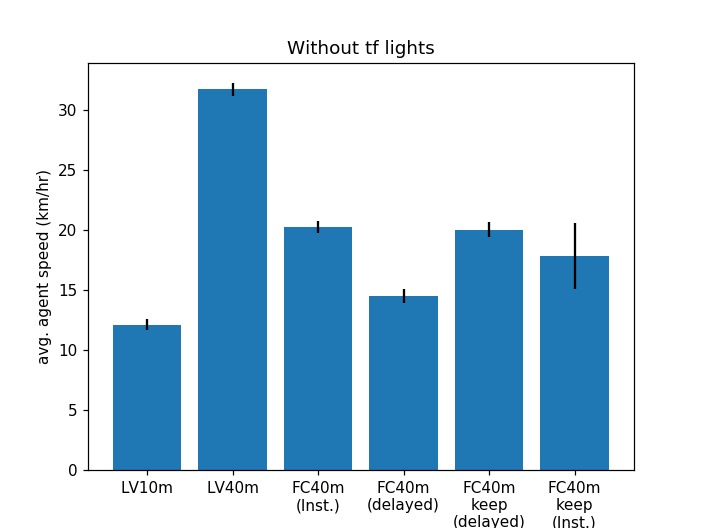

In [46]:
xticks = ['LV10m', 'LV40m', 'FC40m\n(Inst.)', 'FC40m\n(delayed)' ,'FC40m\nkeep\n(delayed)', 'FC40m\nkeep\n(Inst.)']
plt.xticks([0, 1, 2, 3, 4, 5], xticks, rotation=0)
plt.bar([0, 1, 2, 3, 4, 5], [onlyLV10mspeedNoTF.mean(), onlyLV40mspeedNoTF.mean(), FC40mspeedNoTF.mean(), FC40mdelayedspeedNoTF.mean(), FC40mkeepDelayedspeedNoTF.mean(), FC40mkeepInstspeedNoTF.mean()], yerr=[onlyLV10mspeedNoTF.std(), onlyLV40mspeedNoTF.std(), FC40mspeedNoTF.std(), FC40mdelayedspeedNoTF.std(), FC40mkeepDelayedspeedNoTF.std(), FC40mkeepInstspeedNoTF.std()])
plt.ylabel('avg. agent speed (km/hr)')
plt.title("Without tf lights")
plt.show()
#plt.grid()

# Action Distribution

In [47]:
onlyLV10mActsStatNoTF = getPlanActStats(onlyLV10mDataNoTF)
onlyLV10mplanActsNoTF = parsePlanActs(onlyLV10mActsStatNoTF['complete'],planEncode)
print(onlyLV10mplanActsNoTF)

Complete episodes : 0.99
79/80
{'acc': 57.0638665132336, 'dec': 25.07825086306099, 'do-nothing': 17.83199079401611, 'lane-change': 0.025891829689298044}


In [48]:
onlyLV40mActsStatNoTF = getPlanActStats(onlyLV40mDataNoTF)
onlyLV40mplanActsNoTF = parsePlanActs(onlyLV40mActsStatNoTF['complete'], planEncode)
print(onlyLV40mplanActsNoTF)

Complete episodes : 0.99
79/80
{'acc': 18.75546605293441, 'dec': 7.773878020713464, 'do-nothing': 53.0644418872267, 'lane-change': 20.40621403912543}


In [49]:
FC40mActsStatNoTF = getPlanActStats(FC40mDataNoTF)
FC40mplanActsNoTF = parsePlanActs(FC40mActsStatNoTF['complete'], planEncode)
FC40mcommActsNoTF = parseRegs(FC40mActsStatNoTF['complete'], regs)

Complete episodes : 0.91
73/80


In [50]:
FC40mAgeActsStatNoTF = getPlanActStats(FC40mAgeDataNoTF)
FC40mAgeplanActsNoTF = parsePlanActs(FC40mAgeActsStatNoTF['complete'], planEncode)
FC40mAgecommActsNoTF = parseRegs(FC40mAgeActsStatNoTF['complete'], regs)

NameError: name 'FC40mAgeDataNoTF' is not defined

In [51]:
FC40mAgev2ActsStatNoTF = getPlanActStats(FC40mAgev2DataNoTF)
FC40mAgev2planActsNoTF = parsePlanActs(FC40mAgev2ActsStatNoTF['complete'], planEncode)
FC40mAgev2commActsNoTF = parseRegs(FC40mAgev2ActsStatNoTF['complete'], regs)

NameError: name 'FC40mAgev2DataNoTF' is not defined

In [52]:
FC40mdelayedActsStatNoTF = getPlanActStats(FC40mdelayedDataNoTF)
FC40mdelayedplanActsNoTF = parsePlanActs(FC40mdelayedActsStatNoTF['complete'], planEncode)
FC40mdelayedcommActsNoTF = parseRegs(FC40mdelayedActsStatNoTF['complete'], regs)

Complete episodes : 0.92
183/200


In [53]:
FC40mkeepDelayedActsStatNoTF = getPlanActStats(FC40mkeepDelayedDataNoTF)
FC40mkeepDelayedplanActsNoTF = parsePlanActs(FC40mkeepDelayedActsStatNoTF['complete'], planEncode)
FC40mkeepDelayedcommActsNoTF = parseRegs(FC40mkeepDelayedActsStatNoTF['complete'], regs)

Complete episodes : 0.97
195/200


In [54]:
FC40mkeepInstActsStatNoTF = getPlanActStats(FC40mkeepInstDataNoTF)
FC40mkeepInstplanActsNoTF = parsePlanActs(FC40mkeepInstActsStatNoTF['complete'], planEncode)
FC40mkeepInstcommActsNoTF = parseRegs(FC40mkeepInstActsStatNoTF['complete'], regs)

Complete episodes : 0.89
177/200


<IPython.core.display.Javascript object>


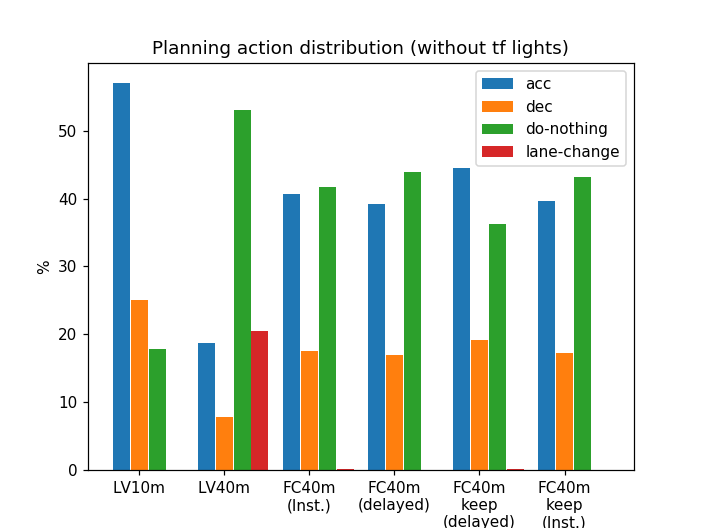

In [55]:
accBar = [onlyLV10mplanActsNoTF['acc'], onlyLV40mplanActsNoTF['acc'], FC40mplanActsNoTF['acc'], FC40mdelayedplanActsNoTF['acc'] ,FC40mkeepDelayedplanActsNoTF['acc'], FC40mkeepInstplanActsNoTF['acc']]
decBar = [onlyLV10mplanActsNoTF['dec'], onlyLV40mplanActsNoTF['dec'], FC40mplanActsNoTF['dec'], FC40mdelayedplanActsNoTF['dec'] ,FC40mkeepDelayedplanActsNoTF['dec'], FC40mkeepInstplanActsNoTF['dec']]
laneChangeBar = [onlyLV10mplanActsNoTF['lane-change'], onlyLV40mplanActsNoTF['lane-change'], FC40mplanActsNoTF['lane-change'], FC40mdelayedplanActsNoTF['lane-change'], FC40mkeepDelayedplanActsNoTF['lane-change'], FC40mkeepInstplanActsNoTF['lane-change']]
nothingBar = [onlyLV10mplanActsNoTF['do-nothing'], onlyLV40mplanActsNoTF['do-nothing'], FC40mplanActsNoTF['do-nothing'], FC40mdelayedplanActsNoTF['do-nothing'], FC40mkeepDelayedplanActsNoTF['do-nothing'], FC40mkeepInstplanActsNoTF['do-nothing']]
plt.bar(np.array([0, 1, 2, 3, 4, 5]) - 0.21, accBar, width=0.2, label='acc')
plt.bar(np.array([0, 1, 2, 3, 4, 5]), decBar, width=0.2, label='dec')
plt.bar(np.array([0, 1, 2, 3, 4, 5]) + 0.21, nothingBar, width=0.2, label='do-nothing')
plt.bar(np.array([0, 1, 2, 3, 4, 5]) + 0.42, laneChangeBar, width=0.2, label='lane-change')
plt.xticks([0, 1, 2, 3, 4, 5], xticks, rotation=0)
plt.legend()
plt.ylabel('%')
plt.title('Planning action distribution (without tf lights)')
plt.show()

<IPython.core.display.Javascript object>


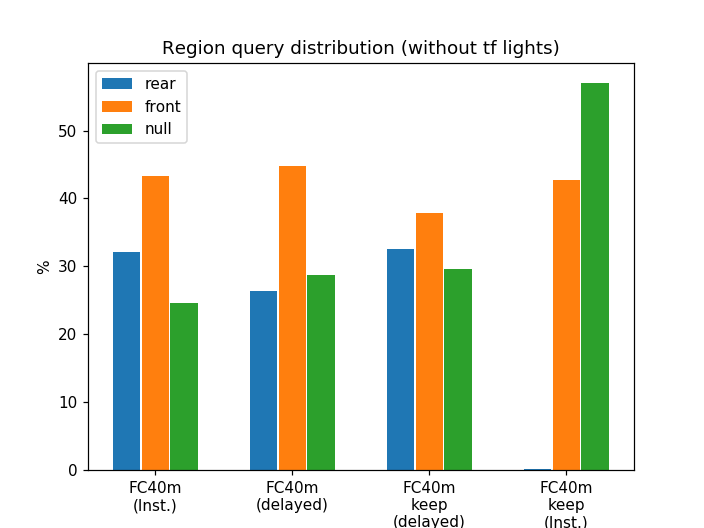

In [56]:
rearBar = [FC40mcommActsNoTF['reg_0'], FC40mdelayedcommActs['reg_0'] , FC40mkeepDelayedcommActsNoTF['reg_0'], FC40mkeepInstcommActsNoTF['reg_0']]
frontBar = [FC40mcommActsNoTF['reg_1'], FC40mdelayedcommActs['reg_1'] , FC40mkeepDelayedcommActsNoTF['reg_1'], FC40mkeepInstcommActsNoTF['reg_1']]
nullBar = [FC40mcommActsNoTF['null'], FC40mdelayedcommActs['null'] , FC40mkeepDelayedcommActsNoTF['null'], FC40mkeepInstcommActsNoTF['null']]

xticks = ['FC40m\n(Inst.)', 'FC40m\n(delayed)', 'FC40m\nkeep\n(delayed)', 'FC40m\nkeep\n(Inst.)']
plt.xticks([0, 1, 2, 3], xticks, rotation=0)
plt.bar(np.arange(0, len([0, 1, 2, 3])) - 0.21, rearBar, width=0.2, label='rear')
plt.bar(np.arange(0, len([0, 1, 2, 3])), frontBar, width=0.2, label='front')
plt.bar(np.arange(0, len([0, 1, 2, 3])) + 0.21, nullBar, width=0.2, label='null')
plt.legend()
plt.ylabel('%')
plt.title('Region query distribution (without tf lights)')
plt.show()

### Without TF

<IPython.core.display.Javascript object>


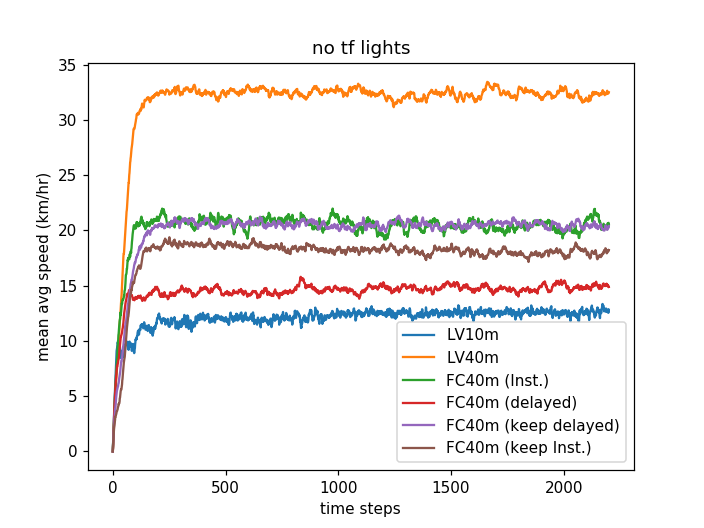

In [57]:
plt.plot(LV10mspeedDataNoTF['complete'].mean(axis=0) * 3.6, label='LV10m')
plt.plot(LV40mspeedDataNoTF['complete'].mean(axis=0) * 3.6, label='LV40m')
plt.plot(FC40mspeedDataNoTF['complete'].mean(axis=0) * 3.6, label='FC40m (Inst.)')
plt.plot(FC40mdelayedspeedDataNoTF['complete'].mean(axis=0) * 3.6, label='FC40m (delayed)')
plt.plot(FC40mkeepDelayedspeedDataNoTF['complete'].mean(axis=0) * 3.6, label='FC40m (keep delayed)')
plt.plot(FC40mkeepInstspeedDataNoTF['complete'].mean(axis=0) * 3.6, label='FC40m (keep Inst.)')
#plt.plot(FC40mAgespeedDataNoTF['complete'].mean(axis=0) * 3.6, label='FC40m Age (delayed)')
#plt.plot(FC40mAgev2speedDataNoTF['complete'].mean(axis=0) * 3.6, label='FC40m Age (Inst.)')
plt.xlabel('time steps')
plt.legend()
plt.title("no tf lights")
plt.ylabel('mean avg speed (km/hr)')
plt.show()

## Age comparison

In [56]:
FC40mAgeTrueAgeDataNoTF = getAgeVector(FC40mAgeDataNoTF)
FC40mAgeAgentAgeDataNoTF = getAgeVector(FC40mAgeDataNoTF, trueAge=False)

In [57]:
FC40mAgev2TrueAgeDataNoTF = getAgeVector(FC40mAgev2DataNoTF)
FC40mAgev2AgentAgeDataNoTF = getAgeVector(FC40mAgev2DataNoTF, trueAge=False)

NameError: name 'FC40mAgev2DataNoTF' is not defined

<IPython.core.display.Javascript object>


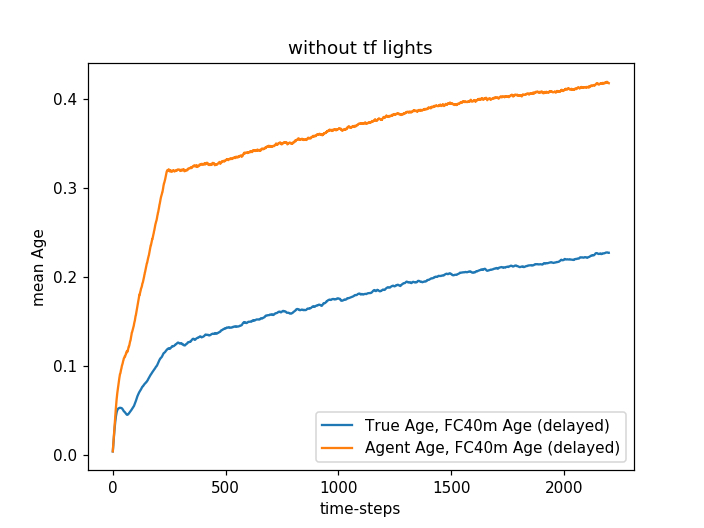

[]

In [58]:
plt.plot(np.arange(np.array(FC40mAgeTrueAgeDataNoTF['complete']).shape[1]), np.array(FC40mAgeTrueAgeDataNoTF['complete']).mean(axis=0), label="True Age, FC40m Age (delayed)")
plt.plot(np.arange(np.array(FC40mAgeAgentAgeDataNoTF['complete']).shape[1]), np.array(FC40mAgeAgentAgeDataNoTF['complete']).mean(axis=0), label="Agent Age, FC40m Age (delayed)")
#plt.plot(np.arange(np.array(FC40mAgev2TrueAgeDataNoTF['complete']).shape[1]), np.array(FC40mAgev2TrueAgeDataNoTF['complete']).mean(axis=0), label="True Age, FC40m Age (Inst.) ")
#plt.plot(np.arange(np.array(FC40mAgev2TrueAgeDataNoTF['complete']).shape[1]), np.array(FC40mAgev2AgentAgeDataNoTF['complete']).mean(axis=0), label="Agent Age, FC40m Age (Inst.)")
#plt.plot(np.array(FC40mAgeTrueAgeData['complete']).mean(axis=0), label="True Age, with lights")
#plt.plot(np.array(FC40mAgeAgentAgeData['complete']).mean(axis=0), label="Agent Age, with lights")
plt.title("without tf lights")
plt.legend()
plt.ylabel('mean Age')
plt.xlabel('time-steps')
plt.plot()